In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
import random


#**Descripción del dataset**




In [3]:
ds = load_dataset("Marxulia/asl_sign_languages_alphabets_v03", split="train")
print(f"Conjunto de entrenamiento: {len(ds)}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/906 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/74.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10873 [00:00<?, ? examples/s]

Conjunto de entrenamiento: 10873


Total de imágenes: 10873
Etiquetas: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Cantidad de etiquetas: 26


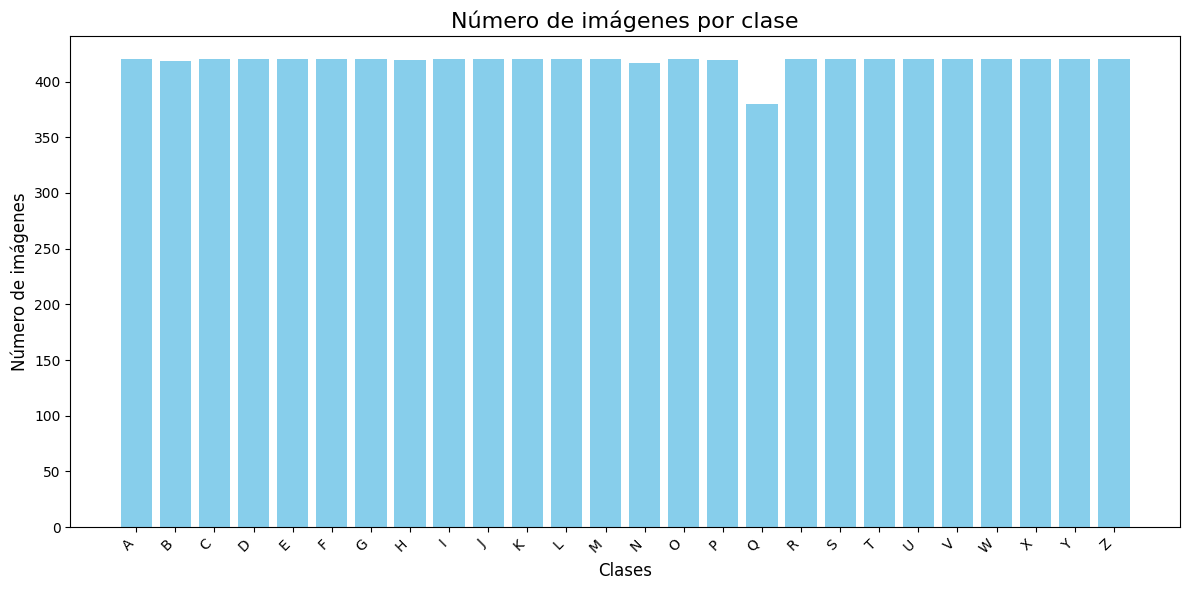

In [4]:
print(f"Total de imágenes: {len(ds)}")

labels = ds.features["label"].names
print(f"Etiquetas: {labels}")
print(f"Cantidad de etiquetas: {len(labels)}")

label_counts = Counter(ds["label"])

plt.figure(figsize=(12, 6))
plt.bar(range(len(labels)), [label_counts[i] for i in range(len(labels))], tick_label=labels, color="skyblue")
plt.title("Número de imágenes por clase", fontsize=16)
plt.xlabel("Clases", fontsize=12)
plt.ylabel("Número de imágenes", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

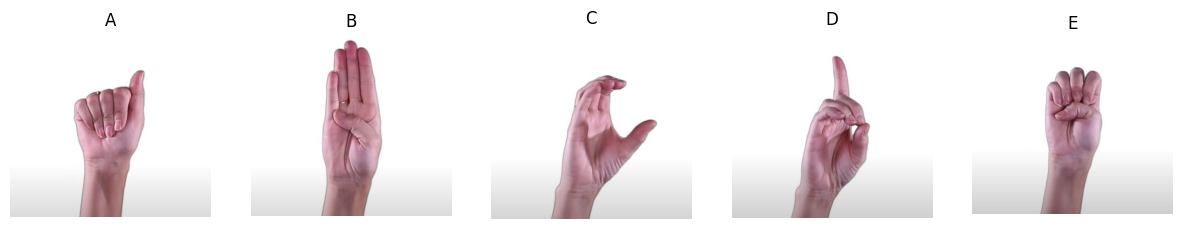

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

shown_classes = set()
for example in ds:
    if example["label"] not in shown_classes:
        ax = axes[len(shown_classes)]
        ax.imshow(example["image"])
        ax.set_title(labels[example["label"]])
        ax.axis("off")
        shown_classes.add(example["label"])
    if len(shown_classes) == 5:
        break
plt.show()

In [6]:
image_sizes = [example["image"].size for example in ds]

unique_sizes = set(image_sizes)
print(f"Tamaños únicos de las imágenes: {unique_sizes}")

if len(unique_sizes) == 1:
    print(f"Todas las imágenes tienen el mismo tamaño: {unique_sizes.pop()}")
else:
    print(f"Las imágenes tienen tamaños variados: {unique_sizes}")

widths, heights = zip(*image_sizes)
print(f"Ancho mínimo: {min(widths)}, Ancho máximo: {max(widths)}")
print(f"Alto mínimo: {min(heights)}, Alto máximo: {max(heights)}")


Tamaños únicos de las imágenes: {(340, 306), (124, 175), (300, 270), (214, 230), (218, 200), (251, 234), (239, 250), (210, 214), (351, 339), (211, 188), (220, 255), (231, 175), (463, 409), (363, 331), (334, 295), (274, 253), (395, 372), (403, 385), (236, 217), (307, 268), (396, 355), (202, 224), (194, 220), (300, 238), (468, 478), (531, 427), (336, 340), (230, 179), (318, 301), (214, 225), (250, 246), (588, 561), (440, 397), (287, 304), (393, 322), (310, 278), (199, 209), (291, 283), (512, 440), (380, 379), (240, 237), (222, 201), (243, 233), (284, 271), (474, 431), (315, 267), (365, 362), (508, 447), (387, 395), (503, 588), (218, 208), (220, 227), (466, 557), (179, 235), (442, 447), (213, 224), (321, 324), (367, 291), (265, 261), (496, 450), (337, 286), (488, 446), (511, 420), (214, 215), (318, 291), (458, 414), (235, 247), (369, 327), (486, 485), (329, 291), (339, 313), (362, 324), (433, 375), (280, 291), (303, 265), (220, 258), (324, 297), (273, 242), (244, 215), (317, 285), (273, 2

#**Preprocesamiento**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [8]:
ds = load_dataset("Marxulia/asl_sign_languages_alphabets_v03", split="train")

def preprocess_image(image):
    image = image.convert("L")
    image = image.resize((32, 32))
    image_array = np.array(image) / 255.0

    return image_array

preprocessed_images = [preprocess_image(image) for image in ds['image']]
labels = ds['label']

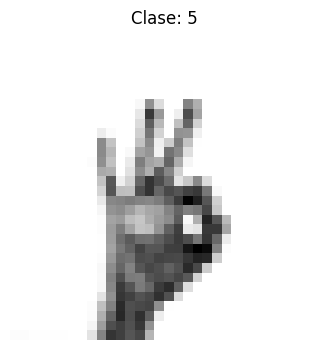

La imagen pertenece a la clase: 5


In [ ]:
random_index = np.random.randint(len(preprocessed_images))
preprocessed_image = preprocessed_images[random_index]
label = labels[random_index]

plt.figure(figsize=(4, 4))
plt.imshow(preprocessed_image, cmap="gray")
plt.title(f"Clase: {label}")
plt.axis("off")
plt.show()

print(f"La imagen pertenece a la clase: {label}")

In [9]:
X = np.array(preprocessed_images)
y = to_categorical(labels, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {len(X_train)} imágenes, Prueba: {len(X_test)} imágenes")

Entrenamiento: 8698 imágenes, Prueba: 2175 imágenes


#**Modelos**

In [ ]:
# @title DNN sencilla
model = Sequential()
model.add(Flatten(input_shape=(32, 32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,554 (525.60 KB)

 Trainable params: 134,554 (525.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title DNN mas capas
model = Sequential()
model.add(Flatten(input_shape=(32, 32)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,378 (2.64 MB)

 Trainable params: 692,378 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title DNN dropout
model = Sequential()
model.add(Flatten(input_shape=(32, 32)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,378 (2.64 MB)

 Trainable params: 692,378 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title CNN sencilla
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,914,010 (56.89 MB)

 Trainable params: 14,914,010 (56.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title CNN Conv2D + MaxPooling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,686,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,854,810 (14.70 MB)

 Trainable params: 3,854,810 (14.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title CNN Conv2D + MaxPooling dos capas
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,366,554 (5.21 MB)

 Trainable params: 1,366,554 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title CNN Conv2D + MaxPooling tres capas
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,906 (1.99 MB)

 Trainable params: 522,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title CNN Conv2D + MaxPooling + BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,802 (2.00 MB)

 Trainable params: 523,354 (2.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# @title CNN Conv2D + MaxPooling + BatchNormalization + Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,802 (2.00 MB)

 Trainable params: 523,354 (2.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# @title CNN Conv2D + MaxPooling + BatchNormalization + Dropout + lr
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_93 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_83 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_84 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,802 (2.00 MB)

 Trainable params: 523,354 (2.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
# @title CNN Conv2D + MaxPooling + BatchNormalization + Dropout + lr + L2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,802 (2.00 MB)

 Trainable params: 523,354 (2.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en el conjunto de validación
    patience=5,          # Espera 5 épocas sin mejora antes de detener
    restore_best_weights=True  # Restaura los pesos de la mejor época
)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),verbose=1)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.0390 - loss: 4.7800 - val_accuracy: 0.0331 - val_loss: 4.2827
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0374 - loss: 4.3864 - val_accuracy: 0.0368 - val_loss: 4.2658
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0430 - loss: 4.3136 - val_accuracy: 0.0405 - val_loss: 4.2495
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0469 - loss: 4.2710 - val_accuracy: 0.0460 - val_loss: 4.2245
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0495 - loss: 4.2419 - val_accuracy: 0.0616 - val_loss: 4.2038
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0553 - loss: 4.2166 - val_accuracy: 0.0662 - val_loss: 4.1855
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0568 - loss: 4.1980 - val_accuracy: 0.0639 - val_loss: 4.1676
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0529 - loss: 4.1825 - val_ac

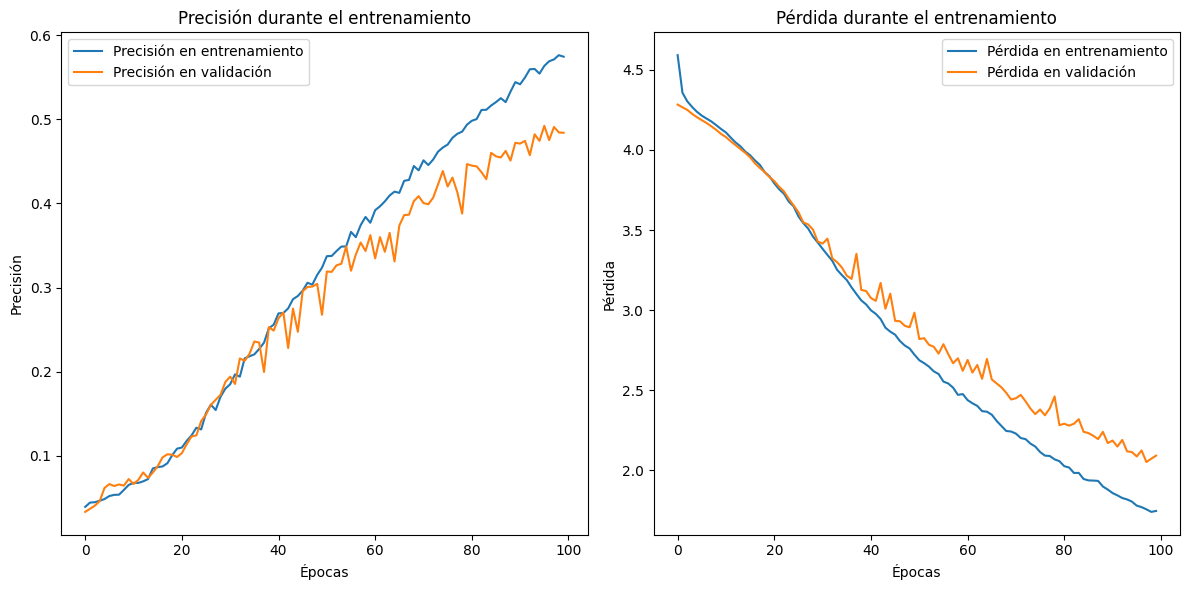

In [12]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Precisión en entrenamiento')
plt.plot(val_acc, label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Pérdida en entrenamiento')
plt.plot(val_loss, label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           A       0.43      0.81      0.56        86
           B       0.48      0.53      0.50        95
           C       0.58      0.42      0.49        78
           D       0.81      0.64      0.72        81
           E       0.41      0.31      0.35        78
           F       0.53      0.60      0.56        88
           G       0.49      0.67      0.57        72
           H       0.67      0.69      0.68        97
           I       0.32      0.13      0.18        87
           J       0.65      0.60      0.62        88
           K       0.41      0.28      0.34        88
           L       0.63      0.70      0.66        81
           M       0.46      0.58      0.51        83
           N       0.25      0.44      0.31        84
           O       0.73      0.69      0.71        75
           P       0.77      0.44      0.56        84
           Q   

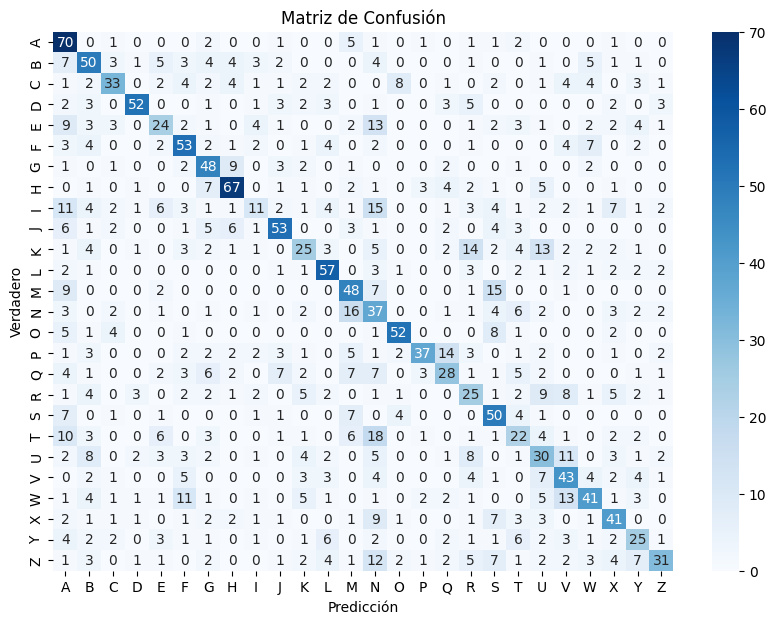

In [13]:
asl_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Reporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=asl_alphabet))

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=asl_alphabet, yticklabels=asl_alphabet)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


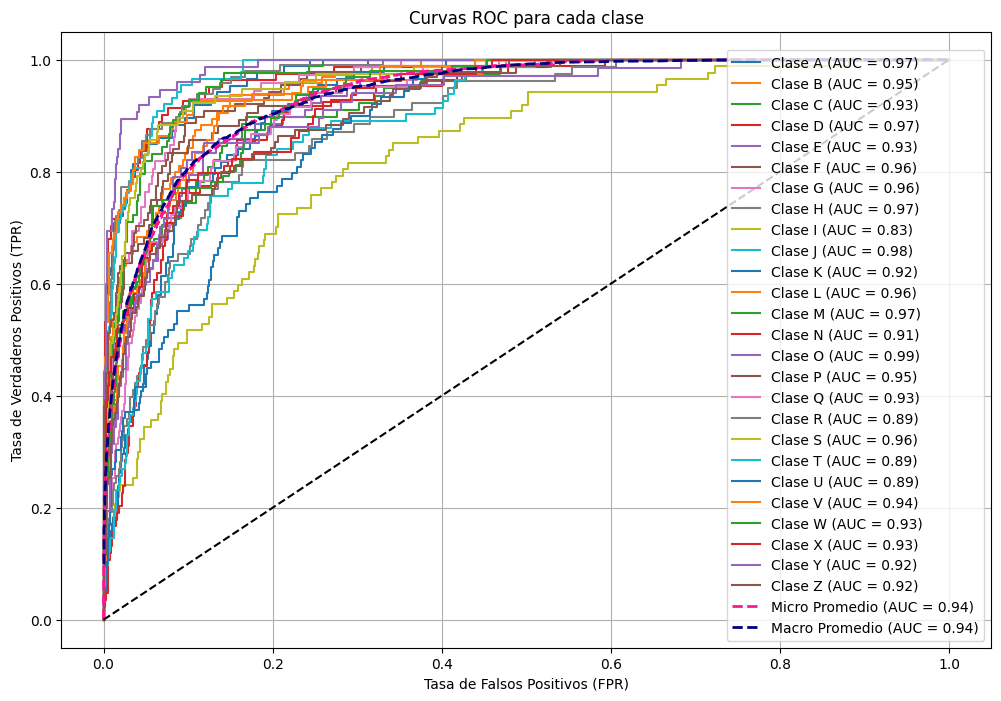

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariza las etiquetas (si no lo están ya)
y_test_bin = label_binarize(y_true_classes, classes=range(26))  # 26 clases (A-Z)

# Calcula las curvas ROC y el AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(26):  # Itera sobre las clases
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula el AUC promedio (micro y macro)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (promedio sobre las clases)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(26)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(26):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 26
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Graficar las curvas ROC
plt.figure(figsize=(12, 8))

# ROC por clase
for i in range(26):
    plt.plot(fpr[i], tpr[i], label=f'Clase {asl_alphabet[i]} (AUC = {roc_auc[i]:.2f})')

# ROC promedio
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro Promedio (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--', linewidth=2)
plt.plot(all_fpr, mean_tpr, label=f'Macro Promedio (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.title('Curvas ROC para cada clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [15]:
model.save('modelo_asl_CNN_Final.h5')
model.save('modelo_asl_CNN_Final.keras')

#**Transfer Learning**

## EfficientNetB0
EfficientNet es una familia de redes neuronales convolucionales (CNN) que tiene como objetivo lograr un alto rendimiento con menos recursos computacionales en comparación con las arquitecturas anteriores. Fue presentada por Mingxing Tan y Quoc V. Le de Google Research en su artículo de 2019 "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks". La idea central detrás de EfficientNet es un nuevo método de escalado que escala uniformemente todas las dimensiones de profundidad, ancho y resolución utilizando un coeficiente compuesto.

### Descripción general de la arquitectura EfficientNet-B0

La red EfficientNet-B0 consta de:

1. Provenir
+ Capa inicial con una convolución estándar seguida de una normalización por lotes y una activación de ReLU6.
+ Convolución con 32 filtros, tamaño de kernel 3x3, paso 2.
2. Cuerpo
+ Consiste en una serie de bloques MBConv con diferentes configuraciones.
+ Cada bloque incluye convoluciones separables en profundidad y capas de compresión y excitación.
+ Ejemplo de configuración para el bloque MBConv:
 + Relación de expansión: El factor por el cual se expanden los canales de entrada.
 + Tamaño del kernel: tamaño del filtro convolucional.
 + Zancada: La longitud de la zancada para la convolución.
 + Relación SE: Relación entre compresión y excitación.
3. Cabeza
+ Incluye un bloque convolucional final, seguido de una capa de agrupamiento promedio global.
+ Una capa completamente conectada con una función de activación softmax para la clasificación.

In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar y preprocesar las imágenes
ds = load_dataset("Marxulia/asl_sign_languages_alphabets_v03", split="train")

def preprocess_image(image):
    image = image.resize((32, 32))  # Redimensionar al tamaño esperado
    image_array = np.array(image) / 255.0  # Normalizar los píxeles
    return image_array

preprocessed_images = [preprocess_image(image) for image in ds['image']]
labels = ds['label']

X = np.array(preprocessed_images)
y = to_categorical(labels, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo base EfficientNetB0 (adaptado a 32x32 usando include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base para mantener los pesos preentrenados
base_model.trainable = False

# Construir el modelo personalizado
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,873,021 (18.59 MB)

 Trainable params: 823,450 (3.14 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [5]:
# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en el conjunto de validación
    patience=5,          # Espera 5 épocas sin mejora antes de detener
    restore_best_weights=True  # Restaura los pesos de la mejor época
)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),verbose=1)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - accuracy: 0.0398 - loss: 3.2846 - val_accuracy: 0.0372 - val_loss: 3.2603
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.0333 - loss: 3.2677 - val_accuracy: 0.0372 - val_loss: 3.2595
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0365 - loss: 3.2619 - val_accuracy: 0.0400 - val_loss: 3.2589
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0372 - loss: 3.2597 - val_accuracy: 0.0359 - val_loss: 3.2597
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0402 - loss: 3.2612 - val_accuracy: 0.0446 - val_loss: 3.2589
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0402 - loss: 3.2612 - val_accuracy: 0.0405 - val_loss: 3.2589
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.0385 - loss: 3.2591 - val_accuracy: 0.0359 - val_loss: 3.2587
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0370 - loss: 3.2607 -

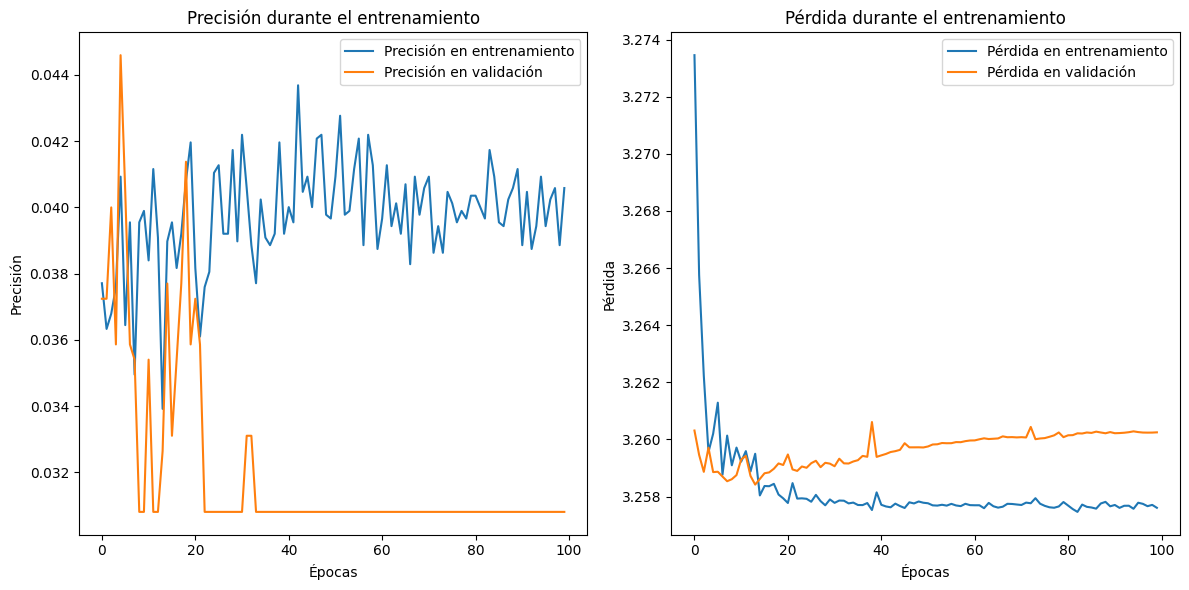

In [6]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Precisión en entrenamiento')
plt.plot(val_acc, label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Pérdida en entrenamiento')
plt.plot(val_loss, label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        86
           B       0.00      0.00      0.00        95
           C       0.00      0.00      0.00        78
           D       0.00      0.00      0.00        81
           E       0.00      0.00      0.00        78
           F       0.00      0.00      0.00        88
           G       0.00      0.00      0.00        72
           H       0.00      0.00      0.00        97
           I       0.00      0.00      0.00        87
           J       0.00      0.00      0.00        88
           K       0.00      0.00      0.00        88
           L       0.00      0.00      0.00        81
           M       0.00      0.00      0.00        83
           N       0.00      0.00      0.00        84
           O       0.00      0.00      0.00        75
           P       0.00      0.00      0.00        84
           Q 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


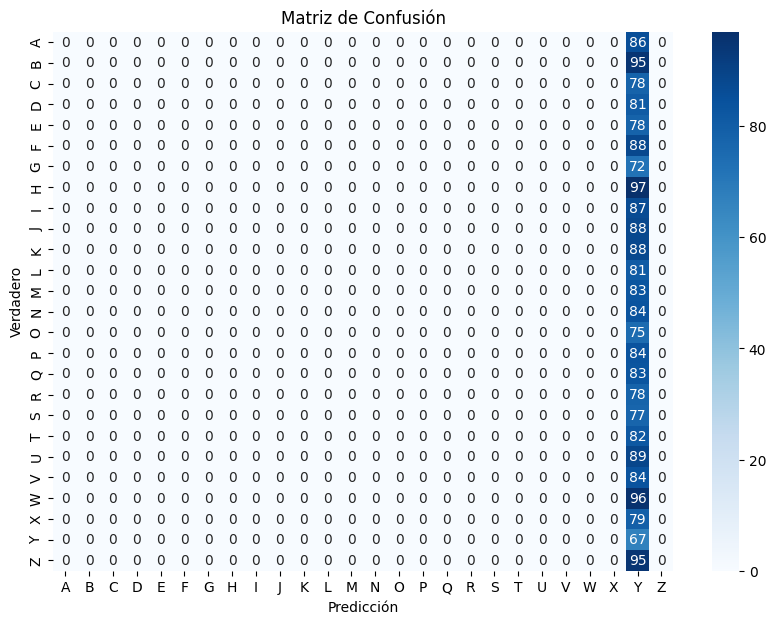

In [7]:
asl_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Reporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=asl_alphabet))

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=asl_alphabet, yticklabels=asl_alphabet)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

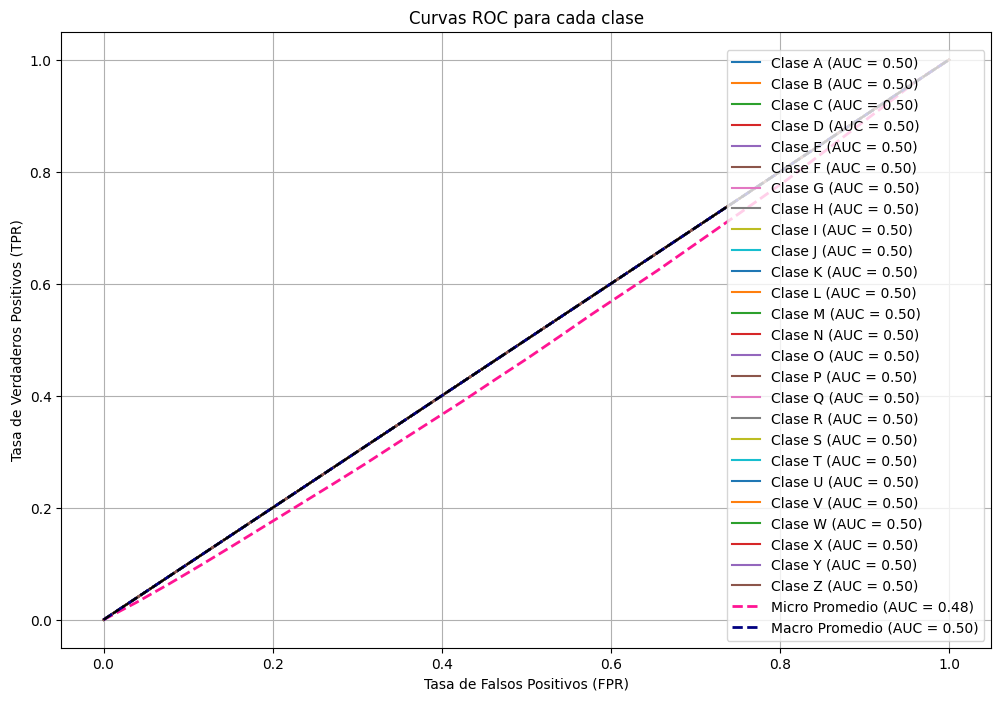

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariza las etiquetas (si no lo están ya)
y_test_bin = label_binarize(y_true_classes, classes=range(26))  # 26 clases (A-Z)

# Calcula las curvas ROC y el AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(26):  # Itera sobre las clases
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula el AUC promedio (micro y macro)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (promedio sobre las clases)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(26)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(26):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 26
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Graficar las curvas ROC
plt.figure(figsize=(12, 8))

# ROC por clase
for i in range(26):
    plt.plot(fpr[i], tpr[i], label=f'Clase {asl_alphabet[i]} (AUC = {roc_auc[i]:.2f})')

# ROC promedio
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro Promedio (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--', linewidth=2)
plt.plot(all_fpr, mean_tpr, label=f'Macro Promedio (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.title('Curvas ROC para cada clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [9]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar y preprocesar las imágenes
ds = load_dataset("Marxulia/asl_sign_languages_alphabets_v03", split="train")

def preprocess_image(image):
    image = image.resize((32, 32))  # Redimensionar a 32x32
    image_array = np.array(image) / 255.0  # Normalizar los píxeles
    return image_array

preprocessed_images = [preprocess_image(image) for image in ds['image']]
labels = ds['label']

X = np.array(preprocessed_images)
y = to_categorical(labels, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo base MobileNetV3 Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Construir el modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduce las dimensiones de salida
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 1, 1, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,402,122 (5.35 MB)

 Trainable params: 463,002 (1.77 MB)

 Non-trainable params: 939,120 (3.58 MB)

In [10]:
# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida en el conjunto de validación
    patience=5,          # Espera 5 épocas sin mejora antes de detener
    restore_best_weights=True  # Restaura los pesos de la mejor época
)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),verbose=1)

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - accuracy: 0.0391 - loss: 3.4464 - val_accuracy: 0.0372 - val_loss: 3.2609
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.0334 - loss: 3.2806 - val_accuracy: 0.0372 - val_loss: 3.2586
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0422 - loss: 3.2715 - val_accuracy: 0.0308 - val_loss: 3.2588
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0352 - loss: 3.2667 - val_accuracy: 0.0405 - val_loss: 3.2578
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0390 - loss: 3.2615 - val_accuracy: 0.0372 - val_loss: 3.2587
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0320 - loss: 3.2640 - val_accuracy: 0.0359 - val_loss: 3.2587
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0367 - loss: 3.2622 - val_accuracy: 0.0506 - val_loss: 3.2582
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0368 - loss: 3.2602 - val_

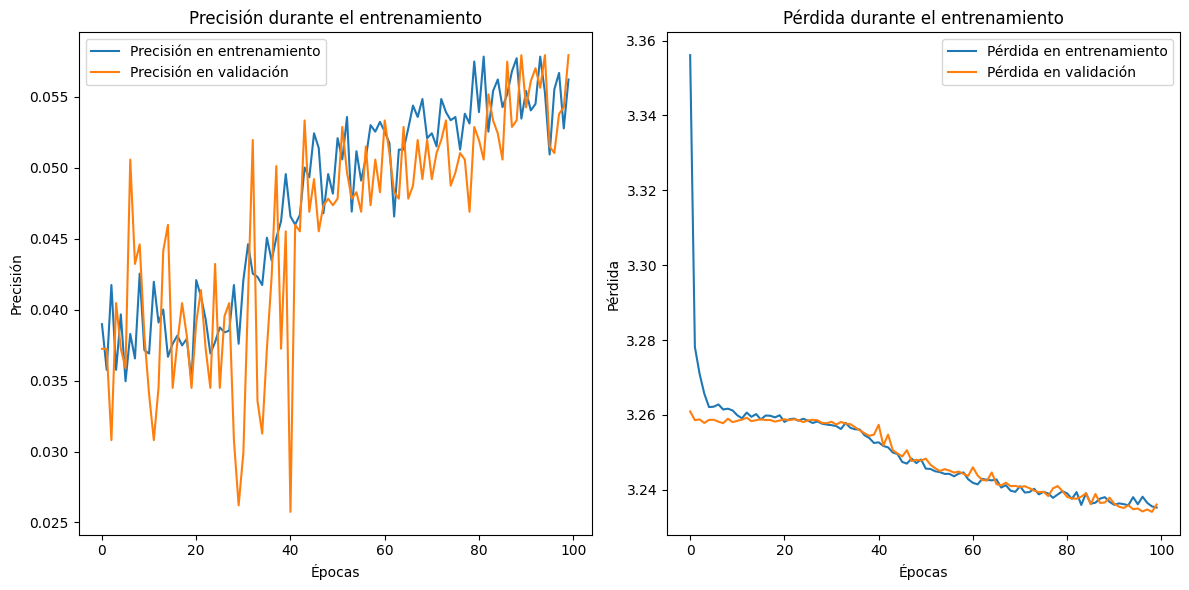

In [11]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Precisión en entrenamiento')
plt.plot(val_acc, label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Pérdida en entrenamiento')
plt.plot(val_loss, label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           A       0.08      0.42      0.13        86
           B       0.00      0.00      0.00        95
           C       0.00      0.00      0.00        78
           D       0.00      0.00      0.00        81
           E       0.05      0.22      0.09        78
           F       0.00      0.00      0.00        88
           G       0.00      0.00      0.00        72
           H       0.00      0.00      0.00        97
           I       0.05      0.14      0.07        87
           J       0.00      0.00      0.00        88
           K       0.00      0.00      0.00        88
           L       0.00      0.00      0.00        81
           M       0.00      0.00      0.00        83
           N       0.00      0.00      0.00        84
           O       0.05      0.59      0.09        75
           P       0.00      0.00      0.00        84
           Q   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


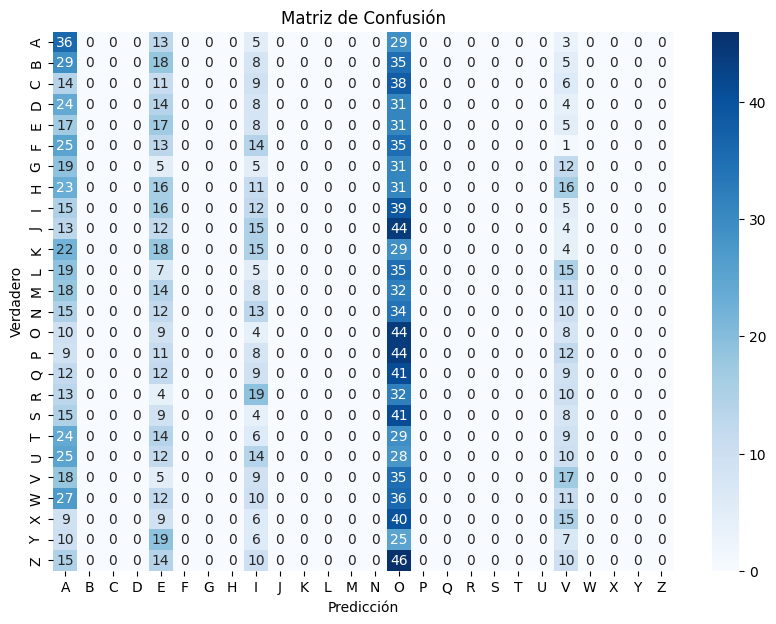

In [12]:
asl_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Reporte de clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=asl_alphabet))

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=asl_alphabet, yticklabels=asl_alphabet)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

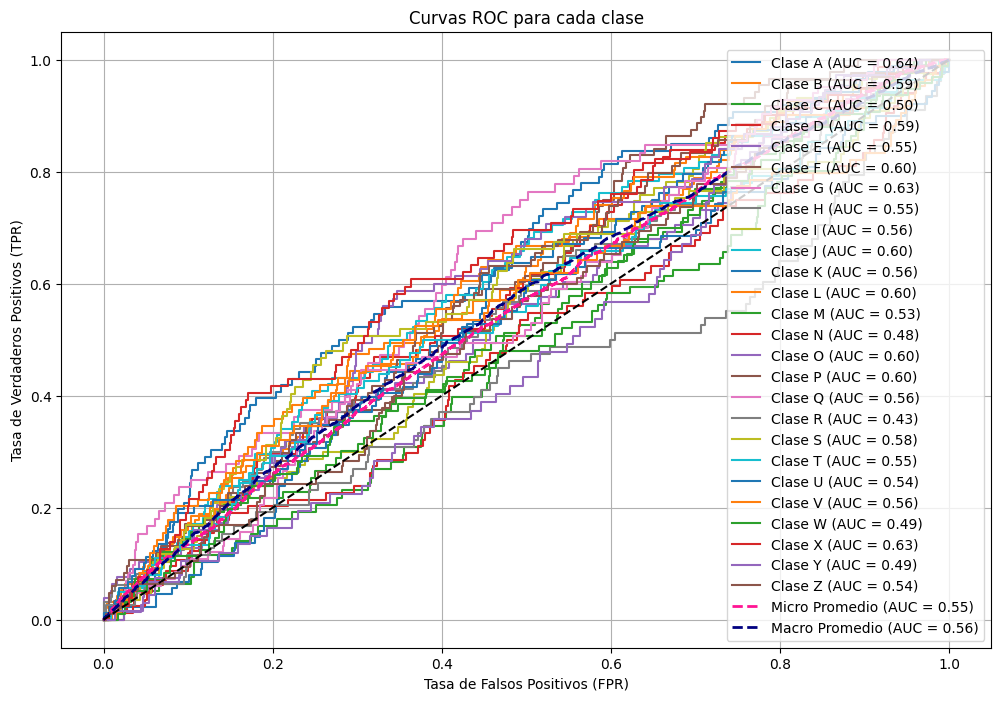

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binariza las etiquetas (si no lo están ya)
y_test_bin = label_binarize(y_true_classes, classes=range(26))  # 26 clases (A-Z)

# Calcula las curvas ROC y el AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(26):  # Itera sobre las clases
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula el AUC promedio (micro y macro)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (promedio sobre las clases)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(26)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(26):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 26
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Graficar las curvas ROC
plt.figure(figsize=(12, 8))

# ROC por clase
for i in range(26):
    plt.plot(fpr[i], tpr[i], label=f'Clase {asl_alphabet[i]} (AUC = {roc_auc[i]:.2f})')

# ROC promedio
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro Promedio (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--', linewidth=2)
plt.plot(all_fpr, mean_tpr, label=f'Macro Promedio (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.title('Curvas ROC para cada clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()